In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json


In [3]:
import pandas as pd
df = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.drop('article_link',axis=1,inplace=True)

In [5]:
sentences= list(df['headline'])
labels = list(df['is_sarcastic'])
sentences[:10],labels[:10]

(['thirtysomething scientists unveil doomsday clock of hair loss',
  'dem rep. totally nails why congress is falling short on gender, racial equality',
  'eat your veggies: 9 deliciously different recipes',
  'inclement weather prevents liar from getting to work',
  "mother comes pretty close to using word 'streaming' correctly",
  'my white inheritance',
  '5 ways to file your taxes with less stress',
  "richard branson's global-warming donation nearly as much as cost of failed balloon trips",
  'shadow government getting too large to meet in marriott conference room b',
  'lots of parents know this scenario'],
 [1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(sentences[0])
print(sequences[0])
print(padded[0])
print(padded.shape)

30885
thirtysomething scientists unveil doomsday clock of hair loss
[16004, 355, 3167, 7474, 2644, 3, 661, 1119]
[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     

## [Stop Word Removals Using NLTK, SpaCy, Genism](https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/)

### Stop Words Removal using NLTK

In [7]:
# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
set(stopwords.words('english'))


# sample sentence
#text = sentences

# set of stop words
stop_words = set(stopwords.words('english')) 

# tokens of words  
#word_tokens = word_tokenize(text) 
    
filtered_sentence = [] 
filtered_sentences = []   
for text in sentences:
    word_tokens = word_tokenize(text) 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    filtered_sentences.append(" ".join(filtered_sentence))
    filtered_sentence = []

print(len(sentences[0]))
print(len(filtered_sentences[0]))  
"""print("\n\nOriginal Sentence \n\n")
print(" ".join(word_tokens)) 

print("\n\nFiltered Sentence \n\n")
print(" ".join(filtered_sentence)) """


61
58


'print("\n\nOriginal Sentence \n\n")\nprint(" ".join(word_tokens)) \n\nprint("\n\nFiltered Sentence \n\n")\nprint(" ".join(filtered_sentence)) '

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(filtered_sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)

sequences = tokenizer.texts_to_sequences(filtered_sentences)
padded = pad_sequences(sequences, padding='post')
print(sentences[0])
print(filtered_sentences[0])
print(sequences[0])
print(padded[0])
print(padded.shape)

27950
thirtysomething scientists unveil doomsday clock of hair loss
thirtysomething scientists unveil doomsday clock hair loss
[15250, 270, 3083, 7281, 2554, 554, 1043]
[15250   270  3083  7281  2554   554  1043     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]
(28619, 107)


### Stopword Removal using spaCy

In [9]:
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[] 
filtered_sentences=[]            
for text in sentences:
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    filtered_sentences.append(" ".join(filtered_sentence))
    filtered_sentence = []

    
print(len(sentences[0]))
print(len(filtered_sentences[0]))  


61
58


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(filtered_sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)

sequences = tokenizer.texts_to_sequences(filtered_sentences)
padded = pad_sequences(sequences, padding='post')
print(sentences[0])
print(filtered_sentences[0])
print(sequences[0])
print(padded[0])
print(padded.shape)

26163
thirtysomething scientists unveil doomsday clock of hair loss
thirtysomething scientists unveil doomsday clock hair loss
[14754, 225, 2979, 6108, 2189, 490, 965]
[14754   225  2979  6108  2189   490   965     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 104)


### Stopword Removal using Gensim

In [11]:
from gensim.parsing.preprocessing import remove_stopwords

# pass the sentence in the remove_stopwords function
filtered_sentences=[]
for text in sentences:
    result = remove_stopwords(text)
    filtered_sentences.append(result)

print('\n\n Filtered Sentence \n\n')
print(len(sentences[0]))
print(len(filtered_sentences[0]))  



 Filtered Sentence 


61
58


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(filtered_sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)

sequences = tokenizer.texts_to_sequences(filtered_sentences)
padded = pad_sequences(sequences, padding='post')
print(sentences[0])
print(filtered_sentences[0])
print(sequences[0])
print(padded[0])
print(padded.shape)

30775
thirtysomething scientists unveil doomsday clock of hair loss
thirtysomething scientists unveil doomsday clock hair loss
[15866, 223, 2973, 7300, 2454, 497, 951]
[15866   223  2973  7300  2454   497   951     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
(28619, 103)


In [13]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [16]:
len(filtered_sentences),len(labels)

(28619, 28619)

In [17]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [20]:
len(training_sentences),len(testing_sentences)

(20000, 8619)

In [23]:
import tensorflow as tf

In [21]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 30
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels),
                    verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.6531 - acc: 0.6194 - val_loss: 0.5255 - val_acc: 0.7959
Epoch 2/30
20000/20000 - 2s - loss: 0.4099 - acc: 0.8393 - val_loss: 0.3689 - val_acc: 0.8407
Epoch 3/30
20000/20000 - 2s - loss: 0.3080 - acc: 0.8784 - val_loss: 0.3388 - val_acc: 0.8529
Epoch 4/30
20000/20000 - 2s - loss: 0.2568 - acc: 0.9011 - val_loss: 0.3294 - val_acc: 0.8591
Epoch 5/30
20000/20000 - 2s - loss: 0.2234 - acc: 0.9133 - val_loss: 0.3353 - val_acc: 0.8521
Epoch 6/30
20000/20000 - 2s - loss: 0.1963 - acc: 0.9273 - val_loss: 0.3456 - val_acc: 0.8544
Epoch 7/30
20000/20000 - 2s - loss: 0.1760 - acc: 0.9347 - val_loss: 0.3488 - val_acc: 0.8543
Epoch 8/30
20000/20000 - 2s - loss: 0.1585 - acc: 0.9422 - val_loss: 0.3669 - val_acc: 0.8473
Epoch 9/30
20000/20000 - 2s - loss: 0.1423 - acc: 0.9495 - val_loss: 0.3811 - val_acc: 0.8475
Epoch 10/30
20000/20000 - 2s - loss: 0.1304 - acc: 0.9535 - val_loss: 0.4018 - val_acc: 0.8442
Epoch 11/3

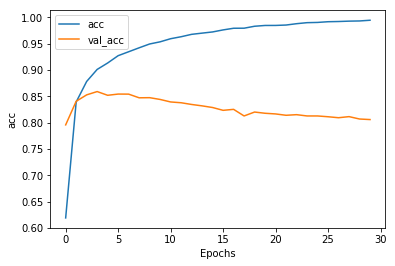

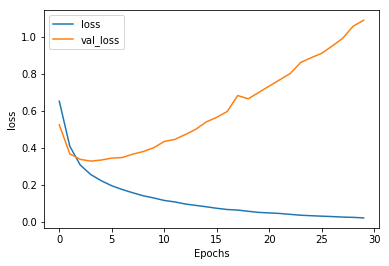

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [29]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [30]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [34]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [33]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')